### 필요한 라이브러리 불러오기

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### url 변수에 크롤링할 홈페이지 주소 가져오기 

In [2]:
url = "http://www.lotteria.com/menu/Menu_All.asp"

### 해당 url의 html을 불러오기 + HTML 분석하고 파싱

In [3]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>롯데리아</title>
<link href="/library/css/style_yg.css" rel="stylesheet" type="text/css"/>
<!-- $$$ -->
<!-- <meta http-equiv="X-UA-Compatible" content="IE=9" /> -->
<meta content="IE=Edge" http-equiv="X-UA-Compatible">
<link href="/Images/common/favicon.png" id="shortcut" rel="shortcut icon"/>
<link href="/library/css/reset.css" rel="stylesheet" type="text/css">
<link href="/library/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/select.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/style.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.theme.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.datepicker.css" rel="stylesheet" type="text/css"/><script src="/library/js/jquery-1.5.1.min.js" type="text/javascript"></script>
<script src="/library/js/plugin/jquery.ui.core.js" type="tex

### 원하는 정보 크롤링하기 - menu_list, kcal_list, price_list 라는 3가지 리스트에 각각 모든 메뉴, 칼로리, 가격 정보 모두 넣기(단 kcal, 원 단위는 생략)

In [4]:
menu_list = []
kcal_list = []
price_list = []

menu_list_all = soup.select('div.cont.menu.roundMiddle>a')
kcal_list_all = soup.select('div.cont.menu.roundMiddle>span')
price_list_all = soup.select('div.cont.menu.roundMiddle>strong')

for tag in menu_list_all:
    menu_list.append(tag.text)
for tag in kcal_list_all:
    kcal_list.append(tag.text[:-4])
for tag in price_list_all:
    price_list.append(tag.text[:-1])
    
price_list
#select_one, select, find, find_all 4가지 연산자 중 선택하여 사용하면 됩니다.

['7,200',
 '6,300',
 '7,400',
 '7,600',
 '7,500',
 '5,900',
 '5,100',
 '5,900',
 '8,300',
 '6,400',
 '13,900',
 '8,000',
 '8,700',
 '15,600',
 '7,700',
 '7,600',
 '6,700',
 '4,900',
 '5,900',
 '11,500',
 '13,600',
 '18,800',
 '9,300',
 '15,900',
 '8,900',
 '5,400',
 '4,300',
 '5,600',
 '5,800',
 '5,500',
 '3,900',
 '2,900',
 '3,700',
 '4,400',
 '7,000',
 '6,000',
 '6,600',
 '5,800',
 '4,900',
 '3,900',
 '2,500',
 '10,000',
 '4,500',
 '2,500',
 '4,500',
 '2,300',
 '2,500',
 '3,800',
 '3,000',
 '4,300',
 '3,400',
 '1,200',
 '1,800',
 '1,700',
 '1,500',
 '2,500',
 '2,500',
 '2,500',
 '2,000',
 '2,200',
 '2,000',
 '1,500',
 '2,300',
 '2,300',
 '2,400',
 '700',
 '2,200',
 '2,500',
 '2,000',
 '2,500',
 '1,500',
 '1,700',
 '1,700',
 '2,100',
 '2,100',
 '2,100',
 '2,000',
 '2,000',
 '2,400',
 '2,400',
 '2,500']

### 가져온 정보(3개의 리스트)를 딕셔너리 형태로 만들기(칼럼명, 순서는 'menu', 'kcal', 'price') + 데이터프레임으로 만들어 5줄만 나타내기 (칼럼 순서 지켜야 함!)

In [5]:
dic = {'menu': menu_list, 'kcal': kcal_list, 'price': price_list}
data = pd.DataFrame(dic)
data

,menu,kcal,price
0,핫클라쓰 세트,"1,231","7,200"
1,마일드클라쓰 세트,"1,095","6,300"
2,리아미라클버거 세트,968,"7,400"
3,와규 에디션Ⅱ 세트,892,"7,600"
4,더블X2 세트,"1,125","7,500"
...,...,...,...
76,아메리카노,34,"2,000"
77,아이스 아메리카노,32,"2,000"
78,카페라떼,210,"2,400"
79,아이스 카페라떼,98,"2,400"


### test 폴더에 csv파일로 저장 (파일이름은 '롯데리아메뉴', 엑셀 파일을 열었을 때 한글이 깨지지 않고, 인덱스 없이 저장하기)

In [6]:
data.to_csv("롯데리아메뉴.csv", index=False, encoding='euc-kr')

### df 변수에 저장했던 csv파일 불러오기, 옵션에 thousands=',' 추가하여 천 단위 표현(,)생략 + 5줄 나타내기

In [7]:
df = pd.read_csv('롯데리아메뉴.csv', encoding='euc-kr', thousands=',')
df.head()

,menu,kcal,price
0,핫클라쓰 세트,1231,7200
1,마일드클라쓰 세트,1095,6300
2,리아미라클버거 세트,968,7400
3,와규 에디션Ⅱ 세트,892,7600
4,더블X2 세트,1125,7500


### df의 총 데이터 건수, 데이터 타입, Null 건수를 한 번에 알아보기

In [8]:
df.info

<bound method DataFrame.info of           menu  kcal  price
0      핫클라쓰 세트  1231   7200
1    마일드클라쓰 세트  1095   6300
2   리아미라클버거 세트   968   7400
3   와규 에디션Ⅱ 세트   892   7600
4      더블X2 세트  1125   7500
..         ...   ...    ...
76       아메리카노    34   2000
77   아이스 아메리카노    32   2000
78        카페라떼   210   2400
79    아이스 카페라떼    98   2400
80       레몬에이드   151   2500

[81 rows x 3 columns]>

### df의 'menu' 칼럼명을 '메뉴'로 수정하기

In [9]:
df.rename(columns={df.columns[0]: '메뉴'}, inplace=True)
df.head()

,메뉴,kcal,price
0,핫클라쓰 세트,1231,7200
1,마일드클라쓰 세트,1095,6300
2,리아미라클버거 세트,968,7400
3,와규 에디션Ⅱ 세트,892,7600
4,더블X2 세트,1125,7500


### df의 인덱스를 확인하기

In [10]:
df.index

RangeIndex(start=0, stop=81, step=1)

### (loc, iloc 명령 중 선택하여 사용) df의 인덱스를 확인하여 맨 마지막 그 다음 행(81번째 행)에 '메뉴'는 '오미자에이드', 'kcal'는 140, 'price'는 3000 정보를 가진 행 추가하기 + 맨 마지막 행 확인하기

In [11]:
df.loc[81] = {'메뉴' : '오미자에이드', 'kcal' : 140, 'price' : 3000}
df.iloc[-1]

메뉴       오미자에이드
kcal        140
price      3000
Name: 81, dtype: object

### df를 복사하여 df2라는 새로운 데이터프레임 만들기

In [12]:
df2= df.copy()

### df2 에 '만족도'라는 새로운 칼럼을 만들어  '만족도' 값이 모두 NaN값을 가지도록 하기 + 5줄 나타내기

In [13]:
df2['만족도']=np.nan
df2.head()

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,마일드클라쓰 세트,1095,6300,NaN
2,리아미라클버거 세트,968,7400,NaN
3,와규 에디션Ⅱ 세트,892,7600,NaN
4,더블X2 세트,1125,7500,NaN


### g_index라는 변수에 kcal가 500미만이고, price가 5000 이하인 인덱스를 저장하기 + 인덱스가 g_index인 '만족도' 값을 모두 5로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [14]:
g_index = df2[(df2['kcal'] <= 500)&(df2['price'] <= 5000)]
for i in g_index.index:
    df2.loc[i, '만족도']=5
df2


,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,마일드클라쓰 세트,1095,6300,NaN
2,리아미라클버거 세트,968,7400,NaN
3,와규 에디션Ⅱ 세트,892,7600,NaN
4,더블X2 세트,1125,7500,NaN
...,...,...,...,...
77,아이스 아메리카노,32,2000,5.0
78,카페라떼,210,2400,5.0
79,아이스 카페라떼,98,2400,5.0
80,레몬에이드,151,2500,5.0


### s_index라는 변수에 kcal가 500이상, 1000미만인 인덱스를 저장하기 + 인덱스가 s_index인 '만족도' 값을 모두 3로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [15]:
s_index = df2[(df2['kcal'] >= 500) & (df2['kcal'] < 1000)]
for i in s_index.index:
    df2.loc[i, '만족도']=3
df2


,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,마일드클라쓰 세트,1095,6300,NaN
2,리아미라클버거 세트,968,7400,3.0
3,와규 에디션Ⅱ 세트,892,7600,3.0
4,더블X2 세트,1125,7500,NaN
...,...,...,...,...
77,아이스 아메리카노,32,2000,5.0
78,카페라떼,210,2400,5.0
79,아이스 카페라떼,98,2400,5.0
80,레몬에이드,151,2500,5.0


### b_index라는 변수에 kcal가 1000이상인 인덱스를 저장하기 + 인덱스가 b_index인 '만족도' 값을 모두 1로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [16]:
s_index = df2[(df2['kcal'] >= 1000)]
for i in s_index.index:
    df2.loc[i, '만족도']=1
df2

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,1.0
1,마일드클라쓰 세트,1095,6300,1.0
2,리아미라클버거 세트,968,7400,3.0
3,와규 에디션Ⅱ 세트,892,7600,3.0
4,더블X2 세트,1125,7500,1.0
...,...,...,...,...
77,아이스 아메리카노,32,2000,5.0
78,카페라떼,210,2400,5.0
79,아이스 카페라떼,98,2400,5.0
80,레몬에이드,151,2500,5.0


### df2의 각각의 칼럼에 총 몇 개의 NaN을 가지고 있는지 한 번에 나타내기

In [17]:
df.isna().sum()

메뉴       0
kcal     0
price    0
dtype: int64

### df2의 '만족도' 칼럼이 NaN인 행의 데이터 찾기

In [18]:
df2[df2['만족도'].isnull()]

,메뉴,kcal,price,만족도
28,와규 에디션Ⅱ,497,5800,NaN


### df2가 갖고 있는 결손 데이터 삭제하기 + 삭제가 잘 되었는지 확인하기  

In [19]:
df2 = df2.dropna()
df.isna().sum()

메뉴       0
kcal     0
price    0
dtype: int64

### df를 'price'가 높은 순서대로 정렬하여 'high_price'라는 새로운 데이터프레임으로 저장하기 + high_price 데이터 프레임의 인덱스를 '메뉴'로 바꾸기 + high_price 상위 7줄 나타내기

In [20]:
high_price = df2.sort_values(by='price', ascending=False)
high_price.set_index('메뉴', inplace=True)
high_price.head(7)

,kcal,price,만족도
메뉴,,,
치킨풀팩,2590,18800,1.0
순살치킨 풀팩,1477,15900,1.0
한우명품팩,1830,15600,1.0
한우연인팩,1714,13900,1.0
패밀리팩,1712,13600,1.0
1인혼닭 세트,801,11500,3.0
1인혼닭,581,10000,3.0


### matplotlib을 사용하여 시각화하기

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

#윈도우
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

#맥
#rc('font', family='AppleGothic')

### 시각화 조건
figure 크기는 (10,10)

plt.scatter을 사용하여 데이터를 점으로 나타내기, x축 값은 df['kcal'], y축 값은 df['price'], 점의 사이즈는 50, 마커 모양은 별모양, 색깔은 초록색

제목은 '롯데리아 메뉴'

x축 제목은 '칼로리'

y축 제목은 '가격'

y축 범위는 0~20000

high_price 데이터 프레임을 사용하여 가격이 높은 상위 7개 메뉴 글자로 나타내기

시각화 한 차트를 현재경로(test폴더)에 png 형식으로 저장하기 (파일명: '롯데리아메뉴_학년반번호이름')
ex) 롯데리아메뉴_3221임은영

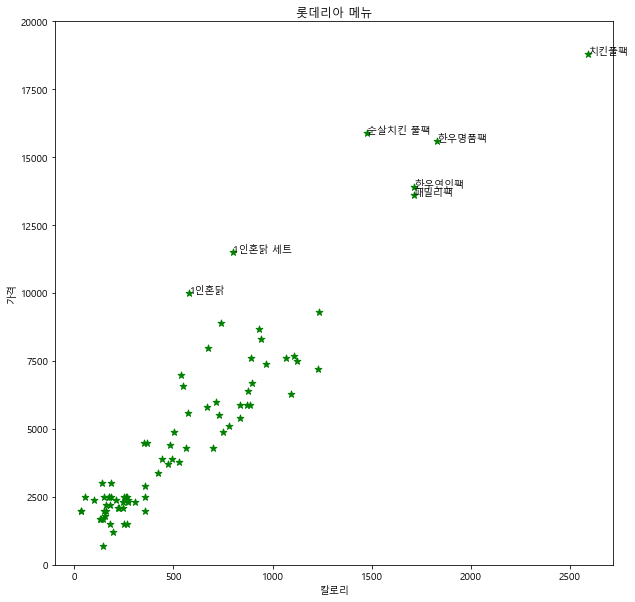

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(high_price['kcal'],high_price['price'], s=50, marker="*", color='g')

plt.title('롯데리아 메뉴')
plt.xlabel('칼로리')
plt.ylabel('가격')
plt.ylim(0,20000)

for i in range(7):
    plt.text(high_price['kcal'][i], high_price['price'][i], high_price.index[i], fontsize=10)

plt.savefig('롯데리아 메뉴_3115정민우.png')
plt.show()